In [73]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Memory Test on Drugged islanders data
## Description of the data set
An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

*Dosages follow a 1:1 ratio to ensure validity
*Happy or Sad memories were primed 10 minutes prior to testing
*Participants tested every day for 1 week to mimic addiction

Building the Case:
Obstructive effects of Benzodiazepines (Anti-Anxiety Medicine):

Long term adverse effects on Long Term Potentiation of synapses, metacognition and memory recall ability
http://www.jstor.org/stable/43854146
Happy Memories:

research shown positive memories to have a deeper and greater volume of striatum representation under an fMRI
https://www.sciencedirect.com/science/article/pii/S0896627314008484
Sad Memories:

research shown sad memories invokes better memory recall for evolutionary purpose whereas, happy memories are more susceptible to false memories
http://www.jstor.org/stable/40064315
Participants - all genders above 25+ years old to ensure a fully developed pre-frontal cortex, a region responsible for higher level cognition and memory recall.

Content
File contains information on participants drug treatment information along with their test scores.

In [74]:
import pandas as pd

In [75]:
import numpy as np
import plotly as plty
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('C:/Users/gotti/Downloads/islander_data.csv')

In [77]:
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


## Attributes of dataset

 1)**first_name** : First name of Islander  
 2)**last_name** : Last name of Islander  
 3)**age** : Age of Islander  
 4)**Happy_Sad_group** : Happy or Sad Memory priming block  
 5)**Dosage** : 1-3 to indicate the level of dosage (low - medium - over recommended daily intake)  
 6)**Drug** : Type of Drug administered to Islander  
 7)**Mem_Score_Before** : Seconds - how long it took to finish a memory test before drug exposure  
 8)**Mem_Score_After** : Seconds - how long it took to finish a memory test after addiction achieved  
 9)**Diff** : Seconds - difference between memory score before and after  

## Shape of dataset:

In [78]:
df.shape

(198, 9)

 Our datset consists of 198 records with 9 columns present in it

## Information of dataset: 
    These gives the information of dataset by giving the type of each attribute

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [80]:
df.isnull().sum()

first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
dtype: int64

 From the above obtained results. we observe there are no missing values present in the data

## Statistics of each variable present in datset:

In [81]:
df.describe(include='all')

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
count,198,198,198.000000,198,198.000000,198,198.000000,198.000000,198.000000
unique,139,18,NaN,2,NaN,3,NaN,NaN,NaN
top,Jun,Durand,NaN,S,NaN,A,NaN,NaN,NaN
freq,5,44,NaN,99,NaN,67,NaN,NaN,NaN
mean,NaN,NaN,39.530303,NaN,1.989899,NaN,57.967677,60.922222,2.954545
std,NaN,NaN,12.023099,NaN,0.818504,NaN,15.766007,18.133851,10.754603
min,NaN,NaN,24.000000,NaN,1.000000,NaN,27.200000,27.100000,-40.400000
25%,NaN,NaN,30.000000,NaN,1.000000,NaN,46.525000,47.175000,-3.175000
50%,NaN,NaN,37.000000,NaN,2.000000,NaN,54.800000,56.750000,1.700000
75%,NaN,NaN,48.000000,NaN,3.000000,NaN,68.400000,73.250000,5.925000


From the above statistics we observe that it consists of minimum age of 24 maximum age is 83 the average age is 37. The minimum **Dosage** is 1 where as maximum is 3 the average is 2. The **Mem_score_Before** minimum seconds are 57 where as maximum seconds are 110 its average seconds are 54. The **Mem_score_After** its minimum seconds are 27 and maximum seconds are 120 where as 56 are its average seconds. BY the obtained values in seconds we observe the difference between them are the minimum difference is -40 seconds from these we observe that the drug is making us to loose the memory very early may be these has been obtained like these because it also consists of the data of the persons with higher dosage of the drug where as its maximum difference is 49 these may be happened by having little dosage and the average is 1.70 seconds these occured due to the minimum dosage. 

## Univariate analysis

## Age:-
 Now we observe the number of the persons present the particular age

In [82]:
df['age'].value_counts()

37    13
29    12
34    11
35    11
25    10
28    10
27     9
26     7
38     7
40     7
32     7
33     7
52     6
51     6
50     5
49     5
30     5
54     4
36     4
39     4
48     4
42     4
53     3
46     3
45     3
31     3
43     2
47     2
41     2
62     2
56     2
63     2
65     2
68     2
44     2
83     1
80     1
55     1
59     1
60     1
66     1
69     1
72     1
73     1
24     1
Name: age, dtype: int64

The above shown data is used to mention the number of persons in the particular age group

## Mean value for each Drug:-
   Now we group the same drug usage persons into one group and we find the mean value for it.

In [83]:
  df1=df.groupby('Drug')['Diff'].agg(['count','mean']).sort_values(by = 'mean',ascending = False)

In [84]:
df1

,count,mean
Drug,,
A,67,9.470149
S,66,-0.171212
T,65,-0.587692


We create a separate data frame for mentioning average age over difference. which is used to group the drugs with the obtained difference of time between drugs before and after.

In [85]:
df['avg_ovr_diff'] = df.groupby('Drug')['Diff'].transform('mean')
df['avg_ovr_diff']

0      9.470149
1      9.470149
2      9.470149
3      9.470149
4      9.470149
         ...   
193   -0.587692
194   -0.587692
195   -0.587692
196   -0.587692
197   -0.587692
Name: avg_ovr_diff, Length: 198, dtype: float64

Now we would group the age group which consists of 5 members in each group

In [86]:
df['age_group'] = pd.cut(
    df['age'],
    np.arange(start=df['age'].min(), step=5, stop=df['age'].max())
)
df[['age', 'age_group']].head()

,age,age_group
0,25,"(24, 29]"
1,52,"(49, 54]"
2,29,"(24, 29]"
3,50,"(49, 54]"
4,52,"(49, 54]"


 Now  we are adding a new column for giving average age group

In [87]:
df['avg_age_diff'] = df.groupby('age_group')['Diff'].transform('mean')
df[['age_group', 'avg_age_diff']].head()

,age_group,avg_age_diff
0,"(24, 29]",2.710417
1,"(49, 54]",4.658333
2,"(24, 29]",2.710417
3,"(49, 54]",4.658333
4,"(49, 54]",4.658333


In the above step  we are adding a new column for giving average age group

## Grouping the persons by Drugs:-
  Now we would group the persons by the type of drug used.

In [88]:
alprazolam_df = df.loc[df['Drug'] == 'A']
alprazolam_df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group,avg_age_diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,9.470149,"(24, 29]",2.710417
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,9.470149,"(49, 54]",4.658333
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,9.470149,"(24, 29]",2.710417
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,9.470149,"(49, 54]",4.658333
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,9.470149,"(49, 54]",4.658333
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Ariane,Steiner,27,S,3,A,54.0,60.0,6.0,9.470149,"(24, 29]",2.710417
63,Naoto,Steiner,39,H,3,A,61.6,88.5,26.9,9.470149,"(34, 39]",5.725641
64,Jade,Summers,40,S,3,A,59.8,79.7,19.9,9.470149,"(39, 44]",2.517647
65,Kevin,Takahashi,34,H,3,A,64.1,90.0,25.9,9.470149,"(29, 34]",0.651515


In [89]:
triazolam_df = df.loc[df['Drug'] == 'T']
triazolam_df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group,avg_age_diff
133,Ross,Bernard,37,S,1,T,46.9,46.9,0.0,-0.587692,"(34, 39]",5.725641
134,Bastian,Carrasco,27,H,1,T,51.4,51.4,0.0,-0.587692,"(24, 29]",2.710417
135,Daniel,Carrasco,28,H,1,T,50.5,56.8,6.3,-0.587692,"(24, 29]",2.710417
136,Jun,Carrasco,30,S,1,T,50.0,42.2,-7.8,-0.587692,"(29, 34]",0.651515
137,William,Carrasco,62,H,1,T,96.0,102.0,6.0,-0.587692,"(59, 64]",2.460000
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0,-0.587692,"(49, 54]",4.658333
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1,-0.587692,"(39, 44]",2.517647
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3,-0.587692,"(49, 54]",4.658333
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2,-0.587692,"(39, 44]",2.517647


In [90]:
sugar_df = df.loc[df['Drug'] == 'S']
sugar_df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group,avg_age_diff
67,Ami,Carrasco,26,H,1,S,75.0,73.3,-1.7,-0.171212,"(24, 29]",2.710417
68,Jose,Carrasco,29,H,1,S,90.0,90.0,0.0,-0.171212,"(24, 29]",2.710417
69,Mai,Carrasco,56,S,1,S,49.2,64.2,15.0,-0.171212,"(54, 59]",-2.225000
70,Yuta,Carrasco,28,H,1,S,54.5,53.6,-0.9,-0.171212,"(24, 29]",2.710417
71,Marianne,Connolly,51,H,1,S,49.3,56.7,7.4,-0.171212,"(49, 54]",4.658333
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Chloe,Steiner,28,S,3,S,69.7,71.9,2.2,-0.171212,"(24, 29]",2.710417
129,Nik,Summers,38,H,3,S,88.7,96.0,7.3,-0.171212,"(34, 39]",5.725641
130,Tobias,Summers,43,S,3,S,49.3,52.7,3.4,-0.171212,"(39, 44]",2.517647
131,Anna,Takahashi,45,H,3,S,81.9,80.6,-1.3,-0.171212,"(44, 49]",3.064706


## Average age difference for each drug:-
   We give the average age difference for each group.

In [91]:
alprazolam_df['avg_age_diff'] = alprazolam_df.groupby('age_group')['Diff'].transform('mean')
alprazolam_df[['age_group', 'avg_age_diff']].head()

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age_group,avg_age_diff
0,"(24, 29]",4.4875
1,"(49, 54]",8.3000
2,"(24, 29]",4.4875
3,"(49, 54]",8.3000
4,"(49, 54]",8.3000


In [92]:
triazolam_df['avg_age_diff'] = triazolam_df.groupby('age_group')['Diff'].transform('mean')
triazolam_df[['age_group', 'avg_age_diff']].head()

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age_group,avg_age_diff
133,"(34, 39]",-0.788889
134,"(24, 29]",1.223077
135,"(24, 29]",1.223077
136,"(29, 34]",-1.833333
137,"(59, 64]",0.233333


In [93]:
sugar_df['avg_age_diff'] = sugar_df.groupby('age_group')['Diff'].transform('mean')
sugar_df[['age_group', 'avg_age_diff']].head()

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age_group,avg_age_diff
67,"(24, 29]",2.231579
68,"(24, 29]",2.231579
69,"(54, 59]",7.650000
70,"(24, 29]",2.231579
71,"(49, 54]",-0.240000


## Usage of the drug:- 
    From the data we observe the number of records available for each drug

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


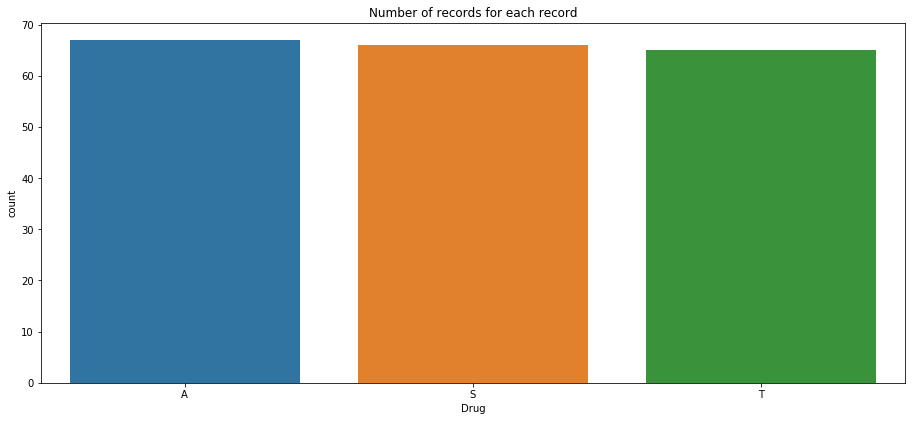

In [94]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Drug', data=df, ax=ax)
plt.tight_layout()
plt.title('Number of records for each record')
plt.show()

From the above obtained plot we observe that the data available for each drug is almost same

## Number of seconds for Mem_score_Before:-
    Now we take the number of seconds for each member before taking drug is as mentioned below.

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


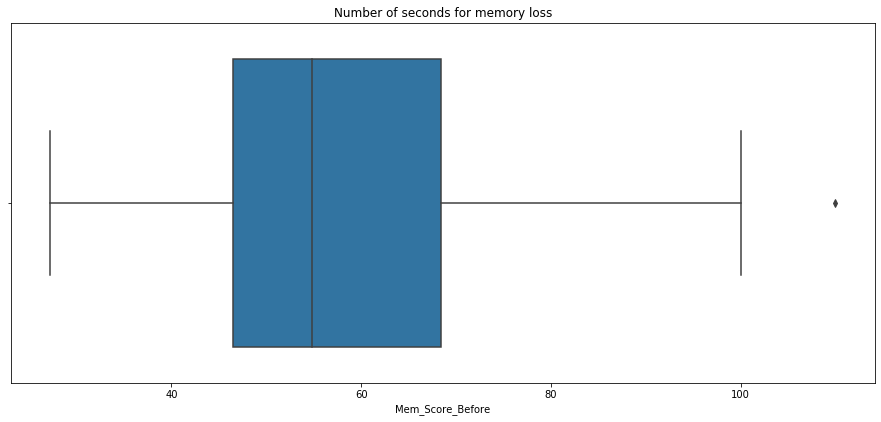

In [95]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.boxplot(x='Mem_Score_Before', data=df, ax=ax)
plt.tight_layout()
plt.title('Number of seconds for memory loss')
plt.show()

From the above obtained boxplot we observe there is one outlayer present in it from the plot we observe the average age is approximately 55.

## Mem_Score_after:-
     The number of seconds for the memory score after the drug is given is obtained below

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


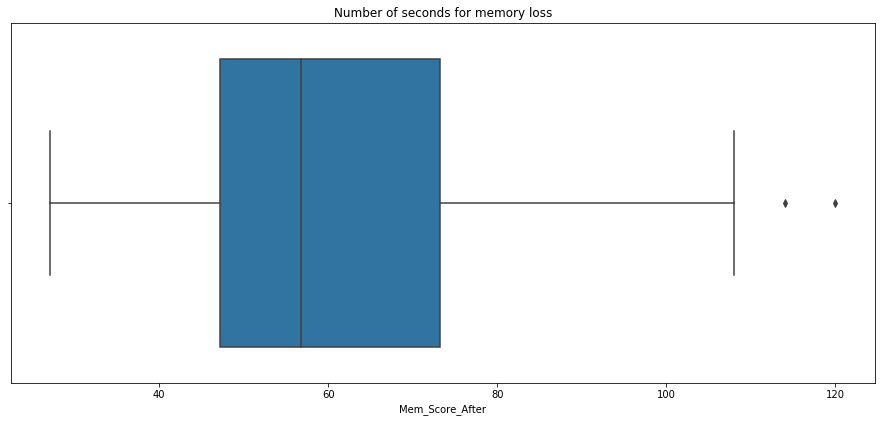

In [96]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.boxplot(x='Mem_Score_After', data=df, ax=ax)
plt.tight_layout()
plt.title('Number of seconds for memory loss')
plt.show()

From the above obtained box plot we observe the average value is approximately 56. It consists of two outliers present in it

## Difference between the memory before and after:-
    Now we observe the difference between the memory before and after the drug is given are mentioned.

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


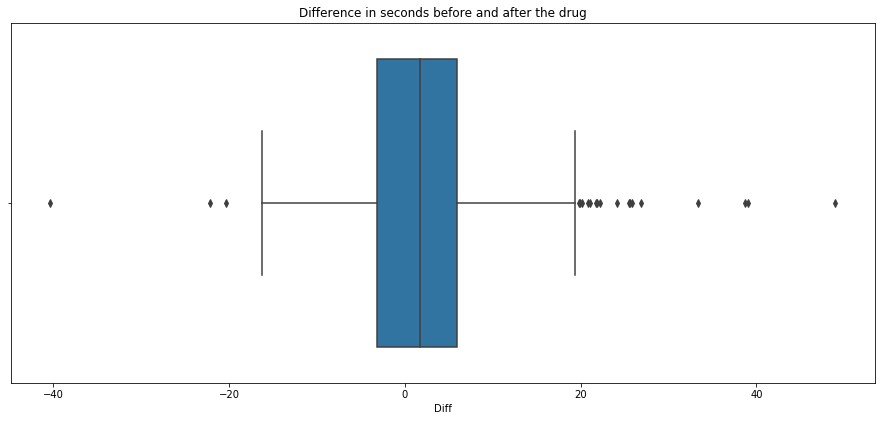

In [97]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.boxplot(x='Diff', data=df, ax=ax)
plt.tight_layout()
plt.title('Difference in seconds before and after the drug')
plt.show()

From the above obtained boxplot we observe more number of outliers present in it the average difference between them is less it would be across 0-5 seconds

# Bivariate Analysis:-

## Difference Memory Before and After:-
     Now we compare the memory before and after the drug is injected

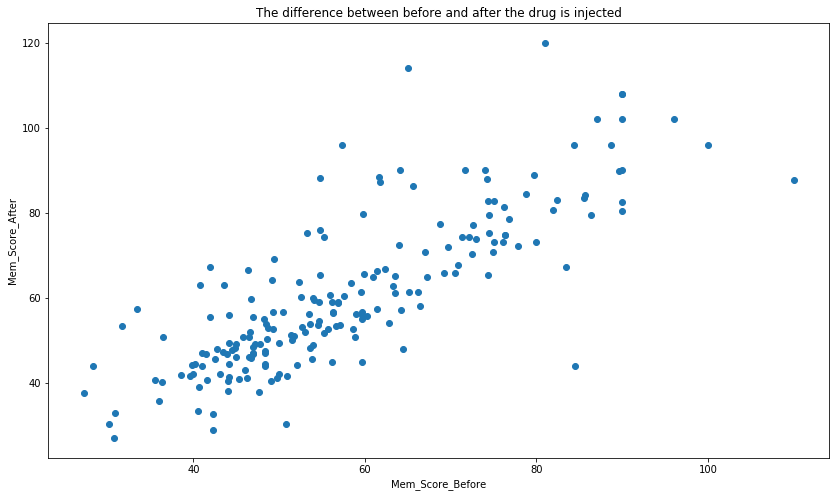

In [98]:
plt.figure(figsize=(14,8))
plt.scatter(x=df['Mem_Score_Before'],y=df['Mem_Score_After'])
plt.title('The difference between before and after the drug is injected')
plt.xlabel('Mem_Score_Before')
plt.ylabel('Mem_Score_After')
plt.show()

From the above obtained scatter plot we observe the memory before and after the drug is injected. It shows that the memory score is almost equal between them.

## Difference in memory score for each drug:- 
   Now we take the difference in memory score by each drug for all ages

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


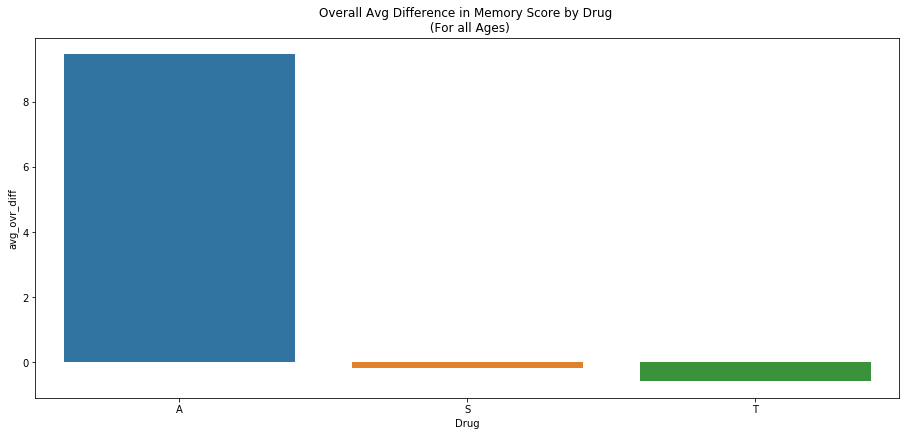

In [99]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['Drug'], y=df['avg_ovr_diff'], ax=ax)
plt.tight_layout()
plt.title('Overall Avg Difference in Memory Score by Drug \n (For all Ages)')
plt.show()

# Multivariate analysis:- 

## Number of observations for each age group:- 
     We take the number of observations for each group.

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


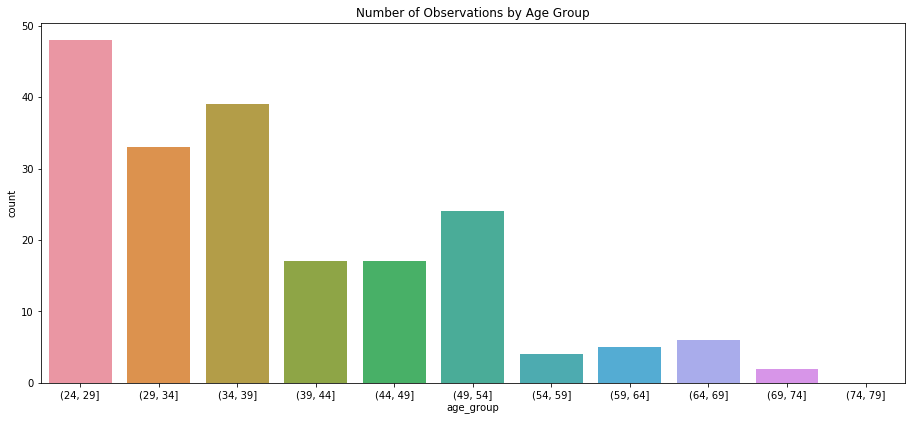

In [100]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='age_group', data=df, ax=ax)
plt.title('Number of Observations by Age Group')
plt.tight_layout()
plt.show()

From the above obtained graph we observe the number of observations for each group.

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


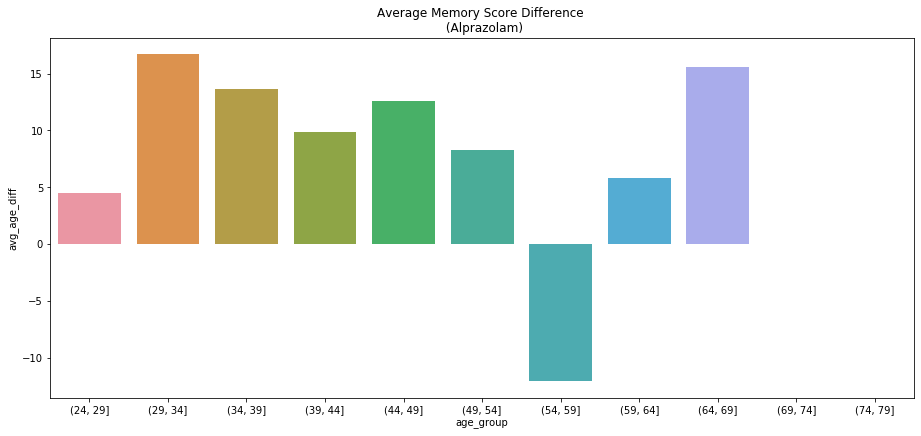

In [101]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=alprazolam_df['age_group'], y=alprazolam_df['avg_age_diff'], ax=ax)
plt.title('Average Memory Score Difference \n (Alprazolam)')
plt.tight_layout()
plt.show()

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


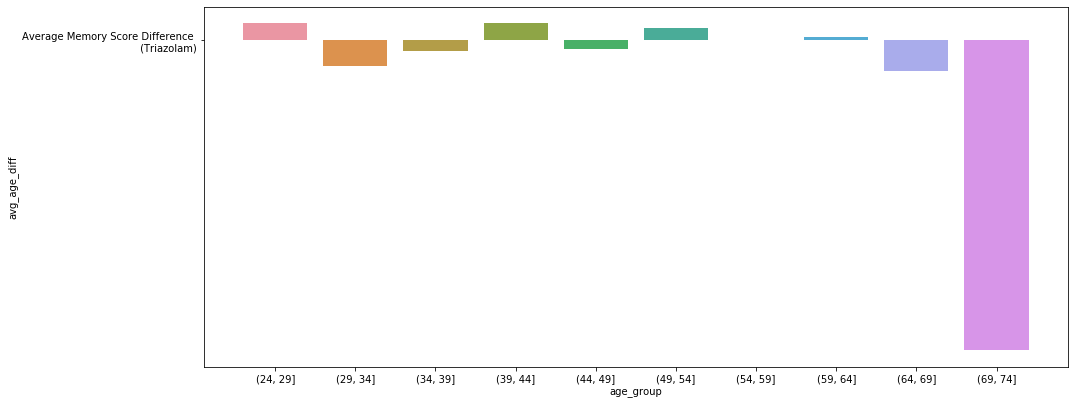

In [102]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=triazolam_df['age_group'], y=triazolam_df['avg_age_diff'], ax=ax)
plt.plot('Average Memory Score Difference \n (Triazolam)')
plt.tight_layout()
plt.show()

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


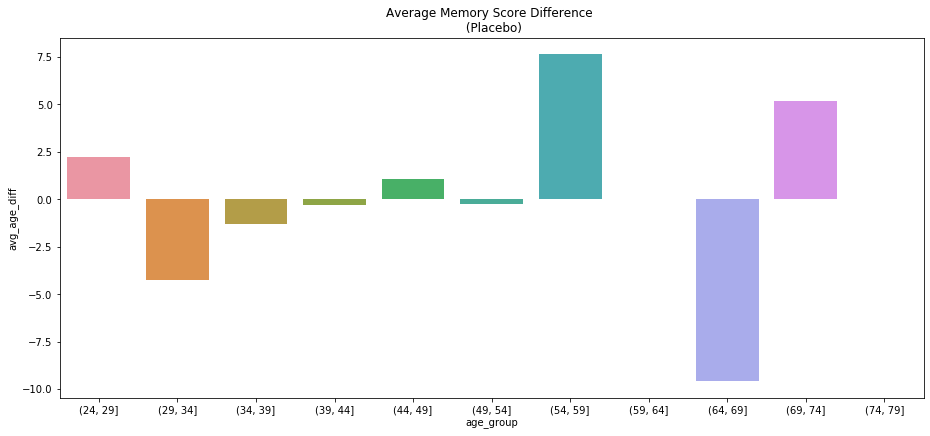

In [103]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=sugar_df['age_group'], y=sugar_df['avg_age_diff'], ax=ax)
plt.title('Average Memory Score Difference \n (Placebo)')
plt.tight_layout()
plt.show()

C:\Users\gotti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


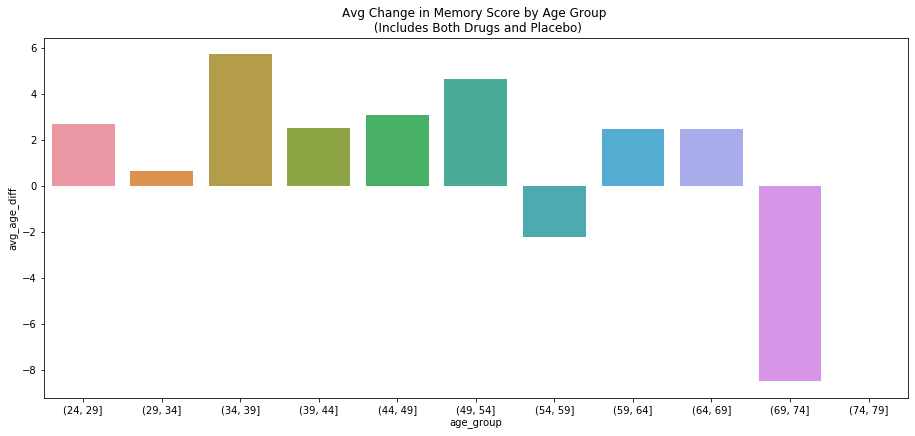

In [104]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['age_group'], y=df['avg_age_diff'], ax=ax)
plt.title('Avg Change in Memory Score by Age Group \n (Includes Both Drugs and Placebo)')
plt.tight_layout()
plt.show()

# Conclusion:- 
    from the above obtained graphs and the results we observe the age group above 64 are not getting affected to the high dosage of drugs where as they are impacting more for using less dosage of drugs. 